<a href="https://colab.research.google.com/github/hwangincheol/AIStudy24/blob/master/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LSTM과 GRU 셀 : 순환 신경망에서 빼 놓을 수 없는 핵심 기술

# 전에 배웠던 SimpleRNN 보다 훨씬 복잡하지만 성능이 뛰어나김 때문에 순환 신경망에 많이 채택 됨
# 일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다.
# 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석 됨
# 멀리 떨어져 있는 단어 정보를 인식하는데 어려울 수 있음 그래서 LSTM과 GRU를 사용함

# LSTM(Long Short-Term Memory)는 말 그대로 단기 기억을 오래 기억하기 위해서 고안됨
# 기본 개념은 동일 함(입력과 가중치를 곱하고 절편을 더해 활성함수를 통과시키는 구조를 여러개 가짐)
# 이런 계산 결과는 다음 타임스텝에 재사용됨

# 1. 은닉상태 만듬 : 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후
# 활성화 함수를 통과시켜 다음 은닉 상태를 만듬
# 이때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용함
# 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듬

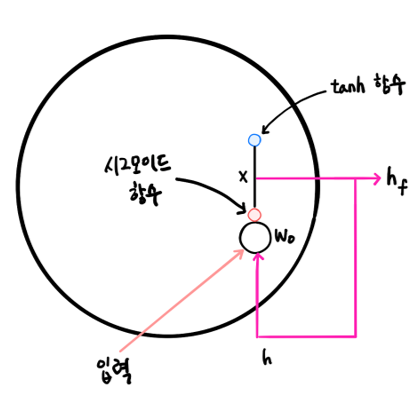

In [ ]:
# 위 그림은 가중치 w_x와 w_h를 통틀어 w_o 라고 표시함
# 파란색 원인 tanh 함수, 주황색 원은 시그모이드 함수임
# x는 곱셈을 나타내고 있음 -> 기본 순환층과 크게 다르지 않음

# tanh 함수를 통과하는 값은 ???
# LSTM에는 순환되는 상태가 2개이다. (은닉 상태, 셀 상태)
# 은닉상태와 달리 셀 상태는 다음 층으로 전달되지 않고, LSTM 셀에서 순환만 되는 값이다.

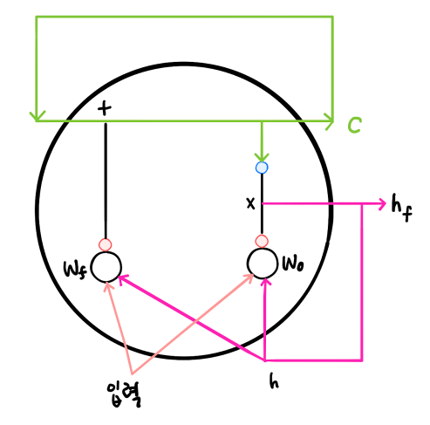

In [2]:
# 위 그림의 녹색은 순환되는 셀의 상태임
# 셀 상태를 은닉 상태 h와 구분하여 c로 표시함

# 셀 상태를 계산하는 과정
# 먼저 입력과 은닉 상태를 또 가중치 w_f에 곱한 다음 시그모이드 함수를 통과함
# 그 다음 이전 타임스탭의 셀 상태와 곱하여 새로운 셀의 상태를 만듬
# 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는데 기여함
# LSTM은 마치 작은 셀을 여러개 포함하고 있는 큰 셀 같다.
# 중요한 것은 입력과 은닉 상태에서 곱해지는 가중치 w_o와 w_f가 다름
#   -> 이 두 작은 셀은 각기 다른 기능을 위해 훈련됨

# 여기에 2개의 작은 셀이 더 추가되어 셀의 상태를 만드는 데 기여함

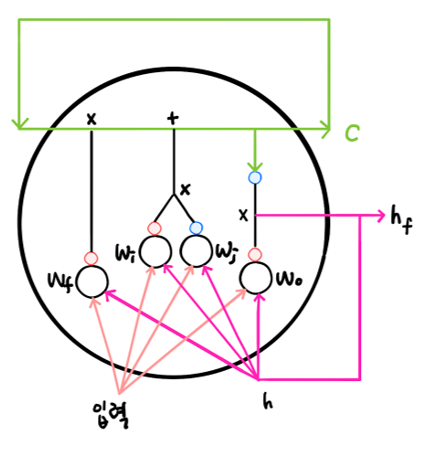

In [ ]:
# 위 그림을 보면 이전과 마찬가지로 입려고가 은닉 상태를 각기 다른 가중치에 곱한 다음
# 하나는 시그모이드 함수를 통과
# 다른 하나는 tanh 함수를 통과 시킨다.
# 그 다음 두 결과를 곱한 후 이전 셀의 상태와 더함 (최종상태의 셀임)

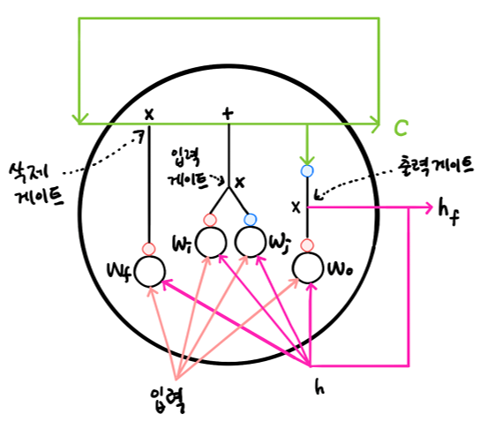

In [3]:
# 세군데 곱셈을 삭제 게이트, 입력 게이트, 출력 게이트라고 부름
# 삭제게이트는 셀의 상태에 있는 정보를 제거하는 역할
# 입력게이트는 새로운 정보를 셀 상태에 추가
# 출력게이트를 통해 이 셀 상태가 다음 은닉 상태로 출력
# 위의 처리는 케라스의 LSTM클래스가 알아서 돌림

In [4]:
# LSTM  신경망 훈련하기
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고
# 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow.keras.datasets import imdb  # LSTM 신경망 훈련하기
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(train_input.shape,val_input.shape, test_input.shape)
#           (20000,)       (5000,)           (25000,)

(20000,) (5000,) (25000,)


In [6]:
# 케라스의 pad_sequences()함수로 각 샘플의 길이를 100에 맞추고 부족할 때 패딩을 추가함.
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)    # truncating = 'pre' 생략가능
val_seq = pad_sequences(val_input, maxlen = 100)

print(train_seq[5]) # 여선번째 토큰을 확인 해보면 앞쪽에 0으로 채워짐

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [7]:
# LSTM 셀을 사용한 순환층을 만들어 보자!!! (예전에 썻던 SimpleRNN클래스를 LSTM으로 변경만 하면 됨)
from tensorflow import keras
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape = (100,)))    # 벡터 이용한 토큰 처리
#                                num_words = 500
#                                     임베딩백터크기 16
#                                           maxlen = 100
model.add(keras.layers.LSTM(8)) # 뉴런개수 8
model.add(keras.layers.Dense(1, activation = 'sigmoid'))    # 활성화 함수 시그모이드(2진분류)

model.summary()
# SimpleRNN 클래스의 모델 파라미터 개수는 200개 였다.
# LSTM 셀에는 작은 셀이 4개 있으므로 정확히 800임

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 컴파일 하고 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

# 배치 크기는 64개, 에포크 횟수는 100으로 지정
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])
# 체크포인트, 조기종료 동일

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5864 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5784 - loss: 0.6907 - val_accuracy: 0.6258 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6217 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6765
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6681 - loss: 0.6682 - val_accuracy: 0.7096 - val_loss: 0.6177
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7180 - loss: 0.6006 - val_accuracy: 0.7248 - val_loss: 0.5760
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7282 - loss: 0.5690 - val_accuracy: 0.7404 - val_loss: 0.5555
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7481 - loss: 0.5465 - val_accuracy: 0.7450 - val_loss: 0.5383
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7600 - loss: 0.5274 - val_acc

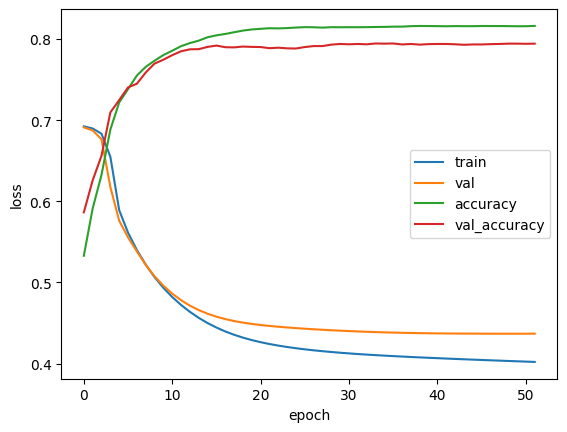

In [10]:
# 52회 81.67% 정확도로 나옴

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val', 'accuracy', 'val_accuracy'])
plt.show()

In [13]:
# 결과를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행하는 것처럼 보임
# 하지만 경우에 따라서 과대 적합을 더 강하게 제어할 필요가 있다. (드롭아웃)

# 완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해서 드롭아웃을 적용 하였었다.
# 이를 통해 모델이 훈련세트에 너무 과대적합되는 것을 막았었음

# 순환층은 자체적으로 드롭아웃 기능을 제공한다.
#   -> 드롭아웃 : 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막음

# SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
# dropout은 셀의 입력에 드롭아웃을 적용, recurrent_dropout은 순환은닉 상태에 드롭아웃을 적용함
# recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못함(모델의 훈련속도가 크게 느려짐)
# 그래서 이번에는 dropout만 적용해 볼 것

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape = (100,)))
model2.add(keras.layers.LSTM(8, dropout = 0.3))  # 드롭아웃 매개값 0.3으로 지정 (30% 입력의 드롭아웃)
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5117 - loss: 0.6930 - val_accuracy: 0.5486 - val_loss: 0.6923
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5475 - loss: 0.6922 - val_accuracy: 0.5682 - val_loss: 0.6915
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5799 - loss: 0.6910 - val_accuracy: 0.5912 - val_loss: 0.6894
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6062 - loss: 0.6885 - val_accuracy: 0.6234 - val_loss: 0.6842
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6280 - loss: 0.6804 - val_accuracy: 0.6518 - val_loss: 0.6574
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6708 - loss: 0.6409 - val_accuracy: 0.7086 - val_loss: 0.6195
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7141 - loss: 0.6104 - val_accuracy: 0.7220 - val_loss: 0.5981
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7323 - loss: 0.5880 - val_ac

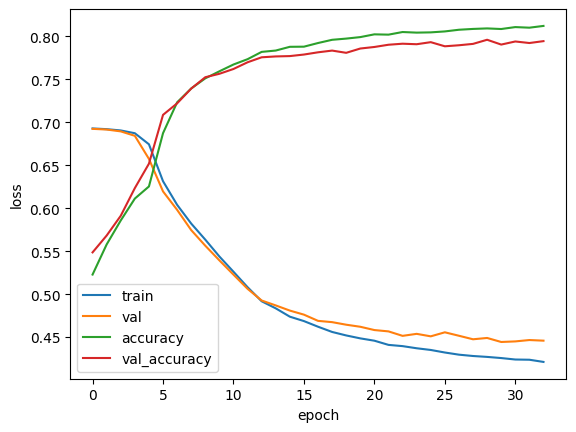

In [16]:
# 드롭아웃 전에는 52회 81.67% 정확도로 나옴
# 드롭아웃 후에는 33회 81.19% 정확도로 나옴

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val', 'accuracy', 'val_accuracy'])
plt.show()  # 훈련손실과 검증 손실 차이가 좁혀진 것을 확인 할 수 있음

In [ ]:
# 2개의 층 연결하기

# 순환층을 연결할 때는 한가지 주의할 점이 있는데
# 순환층의 은닉 상태는 샘플의 마지막 타임스탭에 대한 은닉 상태만 다음층으로 전달됨

# 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함.
# 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야 함
# 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력 해야 한다. (처음에 본 그림)

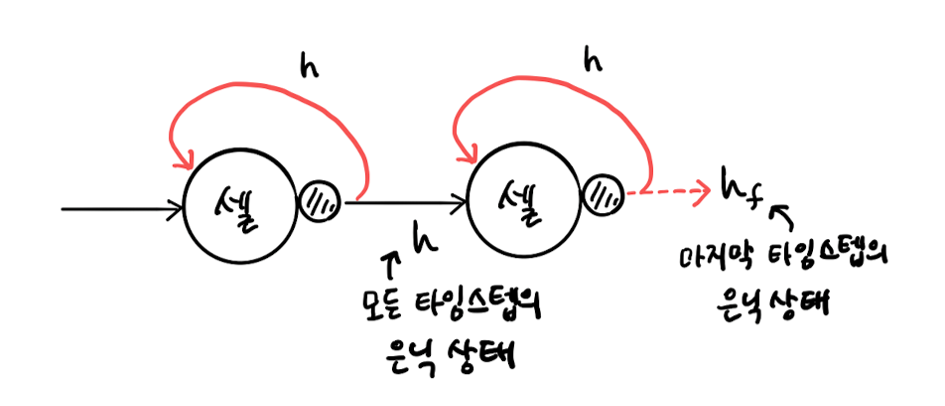

In [17]:
# 케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하러면
# 마지막을 제외한 다른 모든 순환층에서 return_sequences = True 로 지정함
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape = (100,)))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))    # 1번 LSTM
model3.add(keras.layers.LSTM(8, dropout = 0.3))                             # 2번 LSTM
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()
# 첫번째 LSTM 층이 모든 타임스텝(100개)의 은닉상태를 출력하기 때문에
# 출력 크기가 (None, 100, 8)로 표시됨

# 이에 반해 두번째 LSTM층의 출력 크기는 마지막 타임 스텝의 은닉상태만 출력 하기 때문에
# (None, 8)이다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras', save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4921 - loss: 0.6933 - val_accuracy: 0.5296 - val_loss: 0.6929
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5223 - loss: 0.6929 - val_accuracy: 0.5330 - val_loss: 0.6925
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5424 - loss: 0.6925 - val_accuracy: 0.5582 - val_loss: 0.6916
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5709 - loss: 0.6913 - val_accuracy: 0.5886 - val_loss: 0.6890
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5956 - loss: 0.6872 - val_accuracy: 0.6184 - val_loss: 0.6772
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6341 - loss: 0.6675 - val_accuracy: 0.6798 - val_loss: 0.6227
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6857 - loss: 0.6074 - val_accuracy: 0.7128 - val_loss: 0.5786
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7198 - loss: 0.5709 - 

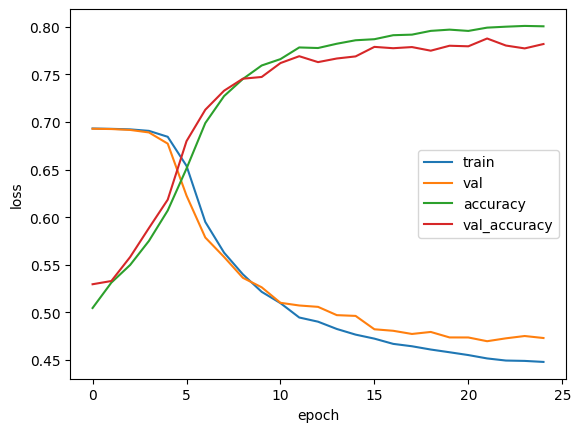

In [19]:
# 드롭아웃 전에는 52회 81.67% 정확도로 나옴
# 드롭아웃 후에는 33회 81.19% 정확도로 나옴
# 층을 추가하고 return_sequences = True로 진행한 이후 25회 79.90% 정확도로 나옴

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val', 'accuracy', 'val_accuracy'])
plt.show()  # 과대적합을 제어하면서 손실을 최대한 낮춘 느낌이다.

In [ ]:
# GRU (Gated Recurrent Units) 구조
# 뉴욕 대학교 조경현 교수가 발명한 셀로 유명함(LSTM을 간소화 버전으로 만듬)
# 셀 상태를 계산하지 않고 은닉상태 하나만 포함하고 있다.

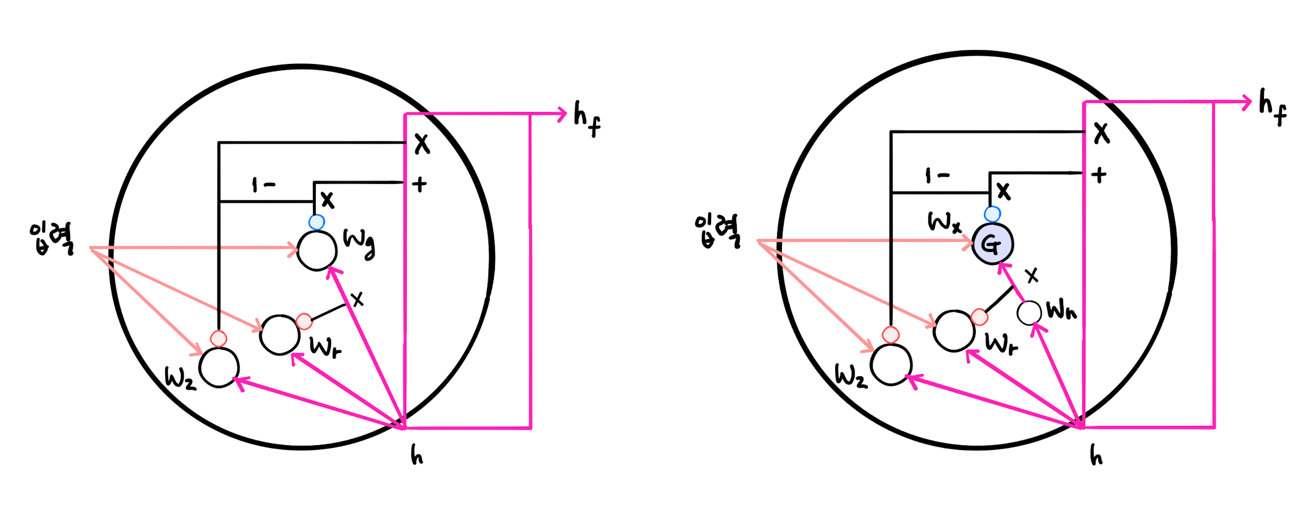

In [ ]:
# GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어있다.
# 2개는 시그모이드 활성화함수를 사용하고 하나는 tanh 활성화 함수를 사용한다.
# 여기에도 은닉 상태와 곱해지는 가중치를 합쳐서 나타냈음

# 맨 왼쪽 w_z를 사용하는 셀의 출력이 은닉 상태에서 바로 곱해져 삭제 게이트 역할을 수행한다.
# 이와 똑같은 출력은 1에서 뺀 다음에 가장 오른쪽 w_g를 사용하는 셀의 출력에 곱한다.
# 이는 입력되는 정보를 제어하는 역할을 수행한다.
# 가운데 w_r을 사용하는 셀에서는 출력된 w_g 셀이 사용할 은닉 상태의 정보를 제어한다.

# GRU셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 좋은 성능을 내는 것으로 알려져 있다.

In [20]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape = (100,)))
model4.add(keras.layers.GRU(8)) # GRU로 변경함
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

model4.summary()
# 파라미터를 계산해보겠다. GRU 셀에는 3개의 작은 셀이 있다.
# 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.
# 입력에 곱하는 가중치는 16 * 8 = 128개 이고, 은닉 상태에 곱하는 가중치는 8 * 8 = 64 이다.
# 절편은 뉴런마다 하나씩 이므로 8개임
# 모두 더하면 128 + 64 + 8 = 200 이런 작은 셀이 3개 이므로 600개 임

# 624개가 된 이유는 3개의 절편마다 8개의 뉴런까지 존재하기 때문에 3 * 8 = 24 까지 더해짐
# 600 + (3 * 8) = 624
# 텐서플로가 이런 계산 방식을 사용하는 이유는 GPU를 잘 활용하기 위해서 임 (LSTM 개선점)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5113 - loss: 0.6929 - val_accuracy: 0.5220 - val_loss: 0.6924
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5423 - loss: 0.6916 - val_accuracy: 0.5396 - val_loss: 0.6910
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5569 - loss: 0.6899 - val_accuracy: 0.5490 - val_loss: 0.6891
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5705 - loss: 0.6875 - val_accuracy: 0.5586 - val_loss: 0.6863
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5871 - loss: 0.6841 - val_accuracy: 0.5760 - val_loss: 0.6823
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6017 - loss: 0.6792 - val_accuracy: 0.5876 - val_loss: 0.6767
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6124 - loss: 0.6723 - val_accuracy: 0.6030 - val_loss: 0.6689
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6241 - loss: 0.6628 - val_acc

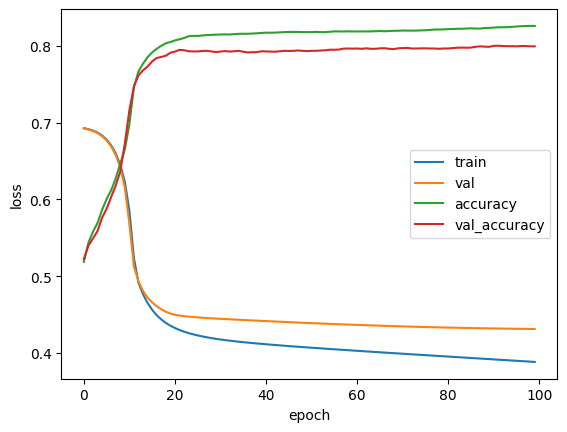

In [22]:
# 드롭아웃 전에는 52회 81.67% 정확도로 나옴
# 드롭아웃 후에는 33회 81.19% 정확도로 나옴
# 층을 추가하고 return_sequences = True로 진행한 이후 25회 79.90% 정확도로 나옴
# 100회 82.56% 정확도로 나옴

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val', 'accuracy', 'val_accuracy'])
plt.show()

In [23]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

rnn_model.evaluate(test_seq, test_target)
# 테스트 성능 계산 해보자~

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7850 - loss: 0.4689


[0.4690413177013397, 0.7859200239181519]

In [24]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-gru-model.keras')

rnn_model.evaluate(test_seq, test_target)
# 테스트 성능 계산 해보자~

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8059 - loss: 0.4282


[0.42775386571884155, 0.8044400215148926]